# 4. Data Mining
We will address finally running the Regression algorithms. In particular we will use: Regression Trees - Forest, Lasso Regression and Linear Regression.


It is important to note that since our models did not perform very well, we attempted to find the reason behind that. The idea was that the "0" values on the target variable, threw our model off during training, so that is why it underperformed. For this reason we included a second training round after having deleted these 0 values from our data set. This can be found on part b. Second Traning (No 0 Popularity). This new split was made using the scaled data.


## Packages to use
Make sure, that we use the packages that were referenced in the slides and in the exercises.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils_io import load_step, save_step
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

X_train = load_step("X_train")
X_test = load_step("X_test")
y_train = load_step("y_train")
y_test = load_step("y_test")

X_train_scaled = load_step("X_train_scaled")
X_test_scaled = load_step("X_test_scaled")

zero_y_train = load_step("y_train_nz")
zero_X_train = load_step("X_train_nz_scaled")
zero_y_test = load_step("y_test_nz")
zero_X_test = load_step("X_test_nz_scaled")

## a. Regression Trees - Forest
The idea when using Regression Trees and Regression Forest is to create two models, one using the unscaled data (since this methods does not require scaling), and one using the scaled data. The intuition is that the performance should be the same on both models. After running both models we can see that our hypothesis was correct and there is in fact no difference between the unscaled and the scaled models when it comes to performance.

#### a.1 Random Forest -Unscaled Data-

In [ ]:
# Random Forest Regressor 
rf = RandomForestRegressor(
    n_estimators=400,        # number of trees
    max_depth=40,           
    min_samples_split=3,     # min samples to split
    min_samples_leaf=1,      # min samples per leaf
    max_features=20,     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf.fit(X_train, y_train)

# pred
y_pred = rf.predict(X_test)

# performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.3f}")

# feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(importances.head(10))

c:\Users\komit\Documents\Education\University\University of Mannheim\1st Sem\Data Mining (IE500)\3. Group Project\datamining_group12\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 266.32
Random Forest R²: 0.367

Top 10 Important Features:
acousticness        0.080777
duration_ms         0.077370
danceability        0.073952
loudness            0.070413
speechiness         0.070134
valence             0.069335
energy              0.068626
tempo               0.062726
instrumentalness    0.062257
liveness            0.058392
dtype: float64


#### a.1 Random Forest -Scaled Data-

In [3]:

rf_scaled = RandomForestRegressor(
    n_estimators=200,        # number of trees
    max_depth=40,            
    min_samples_split=6,     # min samples to split
    min_samples_leaf=2,      # min samples per leaf
    max_features='sqrt',     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf_scaled.fit(X_train_scaled, y_train)

# pred
y_pred_scaled = rf_scaled.predict(X_test_scaled)

# performance
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Random Forest (scaled) MSE: {mse_scaled:.2f}")
print(f"Random Forest (scaled) R²: {r2_scaled:.3f}")

# feature importance
importances_scaled = pd.Series(rf_scaled.feature_importances_, index=X_train_scaled.columns)
importances_scaled = importances_scaled.sort_values(ascending=False)
print("\nTop 10 wichtige Features (scaled):")
print(importances_scaled.head(10))

c:\Users\komit\Documents\Education\University\University of Mannheim\1st Sem\Data Mining (IE500)\3. Group Project\datamining_group12\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest (scaled) MSE: 273.24
Random Forest (scaled) R²: 0.350

Top 10 wichtige Features (scaled):
acousticness        0.077900
duration_ms         0.074563
danceability        0.071787
loudness            0.070548
energy              0.070006
valence             0.066923
speechiness         0.066134
instrumentalness    0.063706
tempo               0.061201
liveness            0.058231
dtype: float64


#### a.2 Regression tree -Unscaled Data-

In [4]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

# Fitting the Regressor
regressor.fit(X_train, y_train)

# Predict the Popularity
y_pred = regressor.predict(X_test)

# What do the metrics say about our model?
print(f"Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print(f"R²: ", r2_score(y_test, y_pred))

Mean Squared Error:  358.97375731915037
R²:  0.14668191589365265


#### a.2 Regression tree -Scaled Data-

In [5]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

# Fitting the Regressor
regressor.fit(X_train_scaled, y_train)

# Predict the Popularity
y_pred_scaled = regressor.predict(X_test_scaled)

# What do the metrics say about the model?
print(f"Mean Squared Error: ", mean_squared_error(y_test, y_pred_scaled))
print(f"R²: ", r2_score(y_test, y_pred))

Mean Squared Error:  358.97375731915037
R²:  0.14668191589365265


#### a.3 Visualization - Random forest

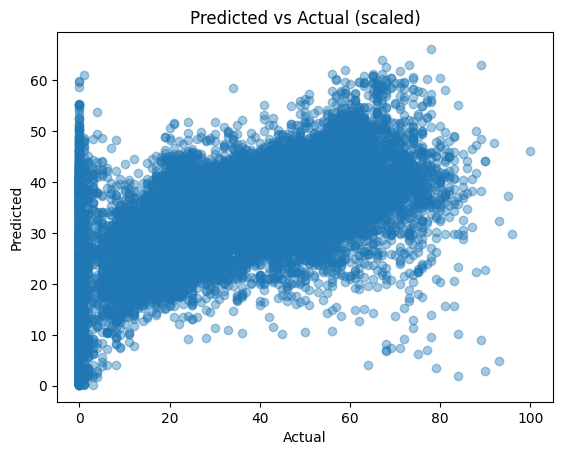

In [6]:
# How did we do?
y_pred_scaled = rf_scaled.predict(X_test_scaled)

plt.scatter(y_test, y_pred_scaled, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (scaled)")
plt.show()

#### a.3 Visualization - Regression tree

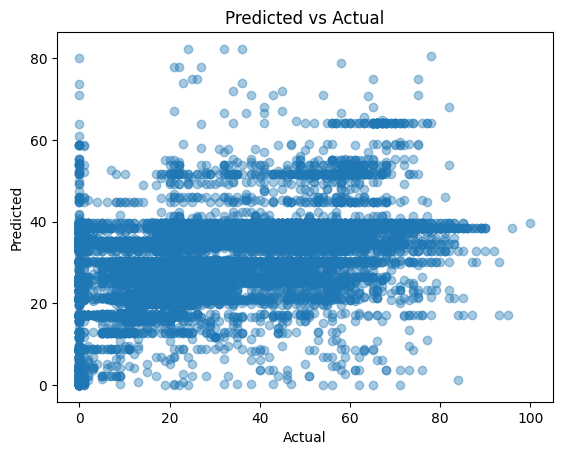

In [7]:
# How did we do?
y_pred = regressor.predict(X_test_scaled)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

## b. Second Traning (No 0 Popularity)
First we are checking for the amount of songs with 0 popularity. We can see in the graph shown below that there is quite a lot. We choose to delete them and retrain our models.

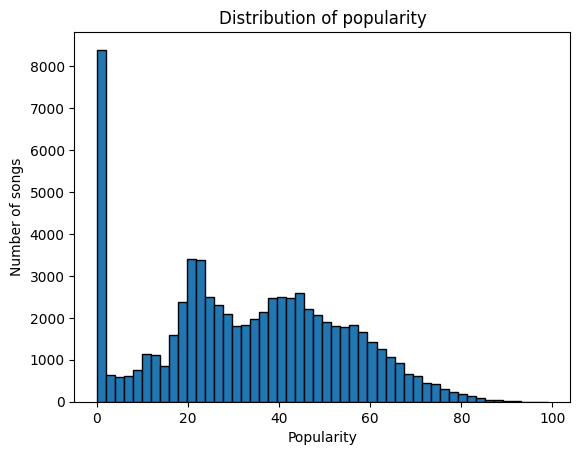

In [8]:
# Check for popularity 
count_zeros = (X_train == 0).sum()
total = len(y_train)
percent_zeros = count_zeros / total * 100

# print(f"Number of Songs with Popularity = 0: {count_zeros}")
# print(f"procent with Popularity = 0: {percent_zeros:.1f}%")

# Visualize
import matplotlib.pyplot as plt
plt.hist(y_train, bins=50, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of songs')
plt.title('Distribution of popularity')
plt.show()

#### b.0 No 0 Popularity
Here we are merging the train and test X & Ys, dropping the columns where popularity is 0 and finally re-splitting them. Unfortunately, the performance did not change that much.

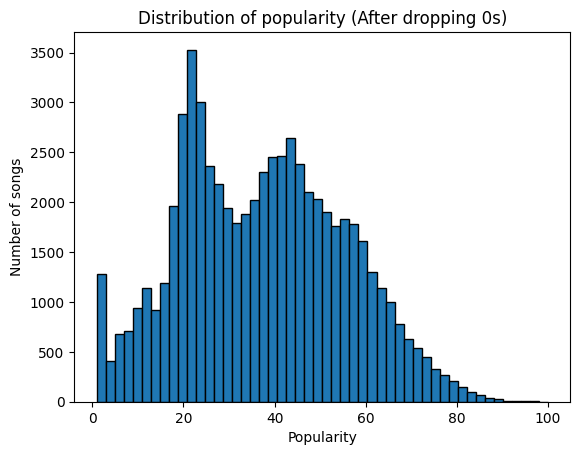

In [9]:
# Check for popularity again
count_zeros = (zero_X_train == 0).sum()
total = len(zero_y_train)
percent_zeros = count_zeros / total * 100

# print(f"Number of Songs with Popularity = 0: {count_zeros}")
# print(f"procent with Popularity = 0: {percent_zeros:.1f}%")

# Visualize
import matplotlib.pyplot as plt
plt.hist(zero_y_train, bins=50, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of songs')
plt.title('Distribution of popularity (After dropping 0s)')
plt.show()

#### b.1 Random Forest (No 0s)

In [10]:
# Random Forest Regressor 
rf = RandomForestRegressor(
    n_estimators=350,        # number of trees
    max_depth=50,           
    min_samples_split=5,     # min samples to split
    min_samples_leaf=1,      # min samples per leaf
    max_features=0.3,     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf.fit(zero_X_train, zero_y_train)

# pred
zero_y_pred = rf.predict(zero_X_test)

# performance
mse = mean_squared_error(zero_y_test, zero_y_pred)
r2 = r2_score(zero_y_test, zero_y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.3f}")

# feature importance
importances = pd.Series(rf.feature_importances_, index=zero_X_train.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(importances.head(10))

c:\Users\komit\Documents\Education\University\University of Mannheim\1st Sem\Data Mining (IE500)\3. Group Project\datamining_group12\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 214.58
Random Forest R²: 0.342

Top 10 Important Features:
acousticness        0.080853
duration_ms         0.079107
instrumentalness    0.078344
loudness            0.070693
energy              0.070295
danceability        0.070034
speechiness         0.069164
valence             0.066886
tempo               0.059047
liveness            0.054342
dtype: float64


#### b.2 Random Trees (No 0s)

In [11]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=14, min_samples_split=16, min_samples_leaf=80)

# Fitting the Regressor
regressor.fit(zero_X_train, zero_y_train)

# Predict the Popularity
zero_y_pred = regressor.predict(zero_X_test)

# What do the metrics say about our model?
print(f"Mean Squared Error: ", mean_squared_error(zero_y_test, zero_y_pred))
print(f"R²: ", r2_score(zero_y_test, zero_y_pred))

# R²:  0.18353158483076748
# R² After Tuning: 0.21960367145043247

Mean Squared Error:  256.3846935568822
R²:  0.21345815990694794


#### b.2.2 Optimization for Random Trees (No 0s)

In [12]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV, KFold

# # Base estimator
# dt = DecisionTreeRegressor(random_state=42)

# # Expanded 3-parameter grid
# param_grid = {
#     "max_depth": [4, 6, 8, 10, 12, 14, 16, 20, None],   # 9
#     "min_samples_split": [2, 5, 10, 20, 40, 80],        # 6
#     "min_samples_leaf": [1, 2, 4, 8, 16]                # 5
# }

# # Total models = 6 × 5 × 4 = 120
# # With 5-fold CV = 600 fits

# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# grid = GridSearchCV(
#     estimator=dt,
#     param_grid=param_grid,
#     scoring="neg_mean_squared_error",
#     cv=cv,
#     n_jobs=-1,
#     verbose=1
# )

# grid.fit(zero_X_train, zero_y_train)

# print("Best params:", grid.best_params_)
# print("Best CV score (neg MSE):", grid.best_score_)

#### b.2.3 Optimization for Random Forest (No 0s)

In [13]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV, KFold
# from sklearn.metrics import mean_squared_error, r2_score
# import pandas as pd
# import warnings

# # Suppress DataConversionWarning to keep output clean
# warnings.filterwarnings('ignore', category=UserWarning)
# warnings.filterwarnings('ignore', message='A column-vector y was passed when a 1d array was expected')

# # Base Random Forest estimator
# rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# # Hyperparameter distributions for Random Forest optimization
# # Using distributions instead of fixed grids for randomized search
# param_distributions = {
#     "n_estimators": [100, 150, 200, 250, 300, 350, 400],   # number of trees in the forest
#     "max_depth": [20, 30, 40, 50, 60, None],               # maximum depth of each tree
#     "min_samples_split": [2, 5, 10, 15, 20],               # min samples required to split an internal node
#     "min_samples_leaf": [1, 2, 4, 6, 8],                   # min samples required at each leaf node
#     "max_features": ['sqrt', 'log2', 0.3, 0.5, 0.7]        # number of features to consider for best split
# }

# # Randomized search will sample 100 combinations from this space
# # With 5-fold CV = 500 fits (much faster than full grid search)

# # 5-fold cross-validation setup
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# # RandomizedSearchCV for efficient hyperparameter search
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_distributions,
#     n_iter=100,                          # number of random combinations to try
#     scoring="neg_mean_squared_error",    # optimize for MSE (lower is better)
#     cv=cv,
#     n_jobs=-1,                           # use all available cores
#     verbose=2,                           # show progress (2 = more detailed output)
#     random_state=42                      # for reproducibility
# )

# # Fit randomized search on training data
# print("Starting hyperparameter optimization with RandomizedSearchCV...")
# print("Testing 100 random parameter combinations (much faster than GridSearch)...\n")

# # Convert y to 1d array to avoid DataConversionWarning
# zero_y_train_1d = zero_y_train.values.ravel() if hasattr(zero_y_train, 'values') else zero_y_train.ravel()

# random_search.fit(zero_X_train, zero_y_train_1d)

# # Display best parameters found
# print("\n" + "="*60)
# print("OPTIMIZATION RESULTS")
# print("="*60)
# print("Best hyperparameters found:")
# for param, value in random_search.best_params_.items():
#     print(f"  {param}: {value}")
# print(f"\nBest CV score (neg MSE): {random_search.best_score_:.2f}")
# print(f"Best CV RMSE: {(-random_search.best_score_)**0.5:.2f}")

# # Use best estimator for final predictions
# best_rf = random_search.best_estimator_
# zero_y_pred = best_rf.predict(zero_X_test)

# # Evaluate on test set
# mse = mean_squared_error(zero_y_test, zero_y_pred)
# r2 = r2_score(zero_y_test, zero_y_pred)
# rmse = mse ** 0.5

# print("\n" + "="*60)
# print("TEST SET PERFORMANCE")
# print("="*60)
# print(f"Optimized Random Forest MSE:  {mse:.2f}")
# print(f"Optimized Random Forest RMSE: {rmse:.2f}")
# print(f"Optimized Random Forest R²:   {r2:.3f}")
# print(f"Improvement in R² from 0.329: {r2 - 0.329:.3f}")

# # Feature importance from best model
# importances = pd.Series(best_rf.feature_importances_, index=zero_X_train.columns)
# importances = importances.sort_values(ascending=False)
# print("\n" + "="*60)
# print("TOP 10 MOST IMPORTANT FEATURES")
# print("="*60)
# print(importances.head(10))

# # Optional: View top 5 parameter combinations from random search
# print("\n" + "="*60)
# print("TOP 5 PARAMETER COMBINATIONS")
# print("="*60)
# results_df = pd.DataFrame(random_search.cv_results_)
# results_df = results_df.sort_values('rank_test_score')
# print(results_df[['params', 'mean_test_score', 'std_test_score']].head(5))